#### Você trabalha como analista de dados em uma rede de franquias, como um ótimo profissional. Seeu gestor solicitou uma análise para avaliar o valor da franquia anual X o custo inicial.

In [11]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
# Carregar o arquivo
caminho = '../ArquivosAnálise/slr12.csv'

dados = pd.read_csv(caminho, sep=';')

#### Obter informações básicas do dataframe.

In [25]:
# Visualuzando o cabeçalho a primeira linha
dados.head()

,FrqAnual,CusInic
0,1000,1050
1,1125,1150
2,1087,1213
3,1070,1275
4,1100,1300


In [14]:
# Visualuzando o cabeçalho a ultima linha
dados.tail(1)

,FrqAnual,CusInic
35,850,1200


In [15]:
# Visualuzando as informações que contém no dataframe
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   FrqAnual  36 non-null     int64
 1   CusInic   36 non-null     int64
dtypes: int64(2)
memory usage: 704.0 bytes


#### Análise exploratória dos dados.

In [16]:
# Verificar se há dados nulos e mostrar a quantidade;
dados.isnull().sum()

FrqAnual    0
CusInic     0
dtype: int64

In [17]:
# Resumo estatístico do dataframe;
dados.describe()

,FrqAnual,CusInic
count,36.000000,36.000000
mean,1134.777778,1291.055556
std,158.583211,124.058038
min,700.000000,1050.000000
25%,1080.000000,1250.000000
50%,1162.500000,1277.500000
75%,1250.000000,1300.000000
max,1375.000000,1830.000000


#### Crie um gráfico boxplot para analisar o comportamento da variável de capital inicial;

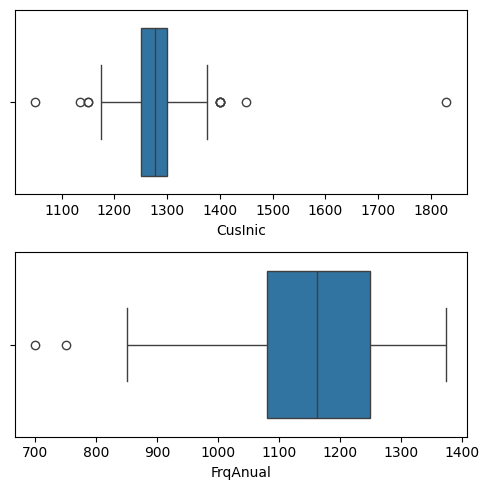

In [22]:
fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(dados['CusInic'], ax = axs[0], orient='h')
plt2 = sns.boxplot(dados['FrqAnual'], ax = axs[1], orient='h')

plt.tight_layout()

#### Crie um histograma com uma curva de densidade para analisar o comportamento da variável capital inicial;

<Axes: xlabel='FrqAnual', ylabel='Count'>

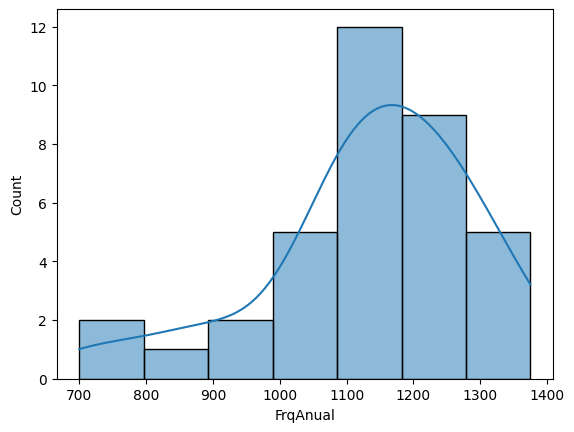

In [19]:
# CRIR UM HISTOGRAMA DA VARIÁVEL PREDITORA
# é usado para analisar a distribuição dos dados
sns.histplot(data=dados,x= 'FrqAnual', kde=True)

#### Gere um gráfico de dispersão entre as variáveis;

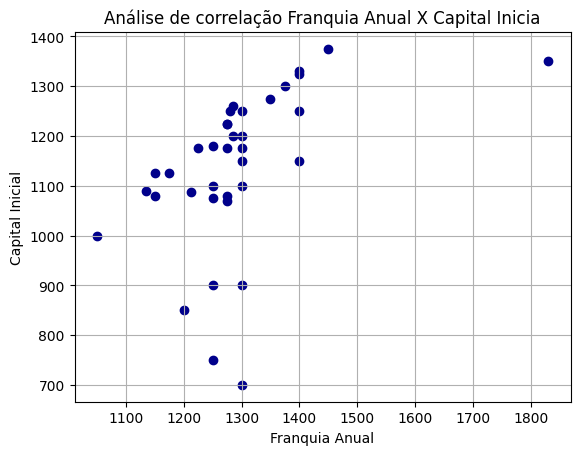

In [27]:
plt.scatter(data= dados, y = 'FrqAnual', x = 'CusInic', color = 'darkblue')
plt.title('Análise de correlação Franquia Anual X Capital Inicia')
plt.xlabel('Franquia Anual')
plt.ylabel('Capital Inicial')
plt.grid(True)

#### Calcule o coeficiente de correlação entre as variáveis capital inicial e valor da franquia anual;
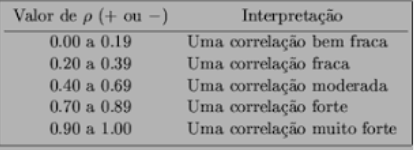

In [26]:
dados.corr()

,FrqAnual,CusInic
FrqAnual,1.000000,0.477007
CusInic,0.477007,1.000000


- A correlação entre a Franquia Anual é de 0.40 que indica um correlação moderada.

#### Separe os dados em duas variáveis X e Y;

In [33]:
x = np.array(dados['FrqAnual'])
y = dados['CusInic']

x = x.reshape(-1,1)

#### Separe sua amostra em treino e teste, sendo que o tamanho do teste será de 20% e random_state igual a 42;

In [34]:
xtrain, xtest, ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=42)

#### Crie o modelo de regressão linear (modelo = LinearRegression);

In [36]:
modelo = LinearRegression(fit_intercept=True)


#### Treine o modelo utilizando o comando modelo.fit(X,Y);

In [37]:
modelo.fit(xtrain,ytrain)

LinearRegression()

#### Faça um teste de previsão com os dados de teste;

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


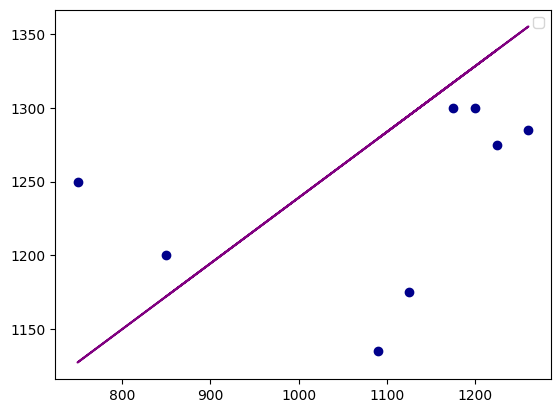

In [40]:
plt.scatter(x = xtest, y = ytest, color = 'darkblue')
plt.plot(xtest, modelo.predict(xtest), color = 'purple')

plt.legend()

#### Modele a equação da reta, exibindo os coeficientes;

In [38]:
print('Coeficiente angular (a): ', modelo.coef_)
print('Coeficiente linear(b): ', modelo.intercept_)

Coeficiente angular (a):  [0.44663092]
Coeficiente linear(b):  792.3841745658324


#### Crie um deploy para que o usuário possa inserir um valor de investimento inicial, para que ele possa obter a previsão do valor anual da franquia.

In [42]:
invest = float(input('Digite um valor aproximado de invetimento R$: '))

investimento = np.array([[invest]])

print(f'Se você investir R$ {invest},'+ f'você terá um retorno em vendas de aproximandamente R$ {investimento}')

Se você investir R$ 50000.0,você terá um retorno em vendas de aproximandamente R$ [[50000.]]
